In [1]:
import numpy as np
import pandas as pd

In [2]:
#plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel("hypertension_training.xls")

In [4]:
data.to_csv("hypertension_training.csv")

In [5]:
data.head()

,patientid,cons_year2021,gender2,age6g,smoke,socioeconomic_quintile,remote3g,first_receiver_hpt,como_ihd,como_stroke,...,como_sleep,como_diab,como_depanxsymp,bmi,comb_antihpt2020,bp_sys_baseline,bp_dias_baseline,bp_sys_avg2021,bp_dias_avg2021,hpt_controlled_2021
0,34,13,Male,75+y,Non smoker,2nd upper quintile,Major Cities,2020-02-18,No,No,...,Yes,No,Yes,NaN,none,145.0,93.0,96.0,55.0,yes
1,265,3,Female,35-49y,Ex smoker,2nd lower quintile,Inner Regional,2020-09-08,No,No,...,No,No,No,NaN,none,140.0,97.0,100.0,73.0,yes
2,670,5,Male,50-64y,Ex smoker,2nd lower quintile,Major Cities,2020-11-20,No,No,...,No,No,No,46.9,ARB alone,142.0,105.0,103.0,63.0,yes
3,46,4,Female,50-64y,Non smoker,Upper quintile,Major Cities,2020-11-04,No,No,...,No,No,No,30.1,none,125.0,80.0,103.5,67.0,yes
4,242,11,Female,75+y,Non smoker,2nd lower quintile,Major Cities,2020-04-16,No,No,...,No,No,No,NaN,none,167.0,85.0,105.0,60.0,yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   patientid               980 non-null    int64         
 1   cons_year2021           980 non-null    int64         
 2   gender2                 980 non-null    object        
 3   age6g                   980 non-null    object        
 4   smoke                   980 non-null    object        
 5   socioeconomic_quintile  980 non-null    object        
 6   remote3g                980 non-null    object        
 7   first_receiver_hpt      980 non-null    datetime64[ns]
 8   como_ihd                980 non-null    object        
 9   como_stroke             980 non-null    object        
 10  como_ckd                980 non-null    object        
 11  como_back_pain          980 non-null    object        
 12  como_sleep              980 non-null    object    

In [7]:
data.describe()

,patientid,cons_year2021,bmi,bp_sys_baseline,bp_dias_baseline,bp_sys_avg2021,bp_dias_avg2021
count,980.000000,980.000000,667.000000,980.000000,980.000000,980.000000,980.000000
mean,490.500000,10.890816,30.125622,160.334354,94.198129,139.492687,83.061224
std,283.045933,8.159625,6.597752,16.564020,10.658769,13.632520,9.498411
min,1.000000,1.000000,14.600000,110.000000,63.000000,96.000000,51.000000
25%,245.750000,5.000000,25.600000,150.000000,87.000000,130.000000,77.000000
50%,490.500000,9.000000,28.900000,160.000000,94.000000,139.000000,83.000000
75%,735.250000,14.000000,33.650000,170.000000,101.000000,148.000000,89.500000
max,980.000000,70.000000,63.200000,227.000000,136.000000,210.000000,118.000000


In [8]:
missing_values = data.isnull().sum()
missing_values

patientid                   0
cons_year2021               0
gender2                     0
age6g                       0
smoke                       0
socioeconomic_quintile      0
remote3g                    0
first_receiver_hpt          0
como_ihd                    0
como_stroke                 0
como_ckd                    0
como_back_pain              0
como_sleep                  0
como_diab                   0
como_depanxsymp             0
bmi                       313
comb_antihpt2020            0
bp_sys_baseline             0
bp_dias_baseline            0
bp_sys_avg2021              0
bp_dias_avg2021             0
hpt_controlled_2021         0
dtype: int64

# Exploratory Data Analysis

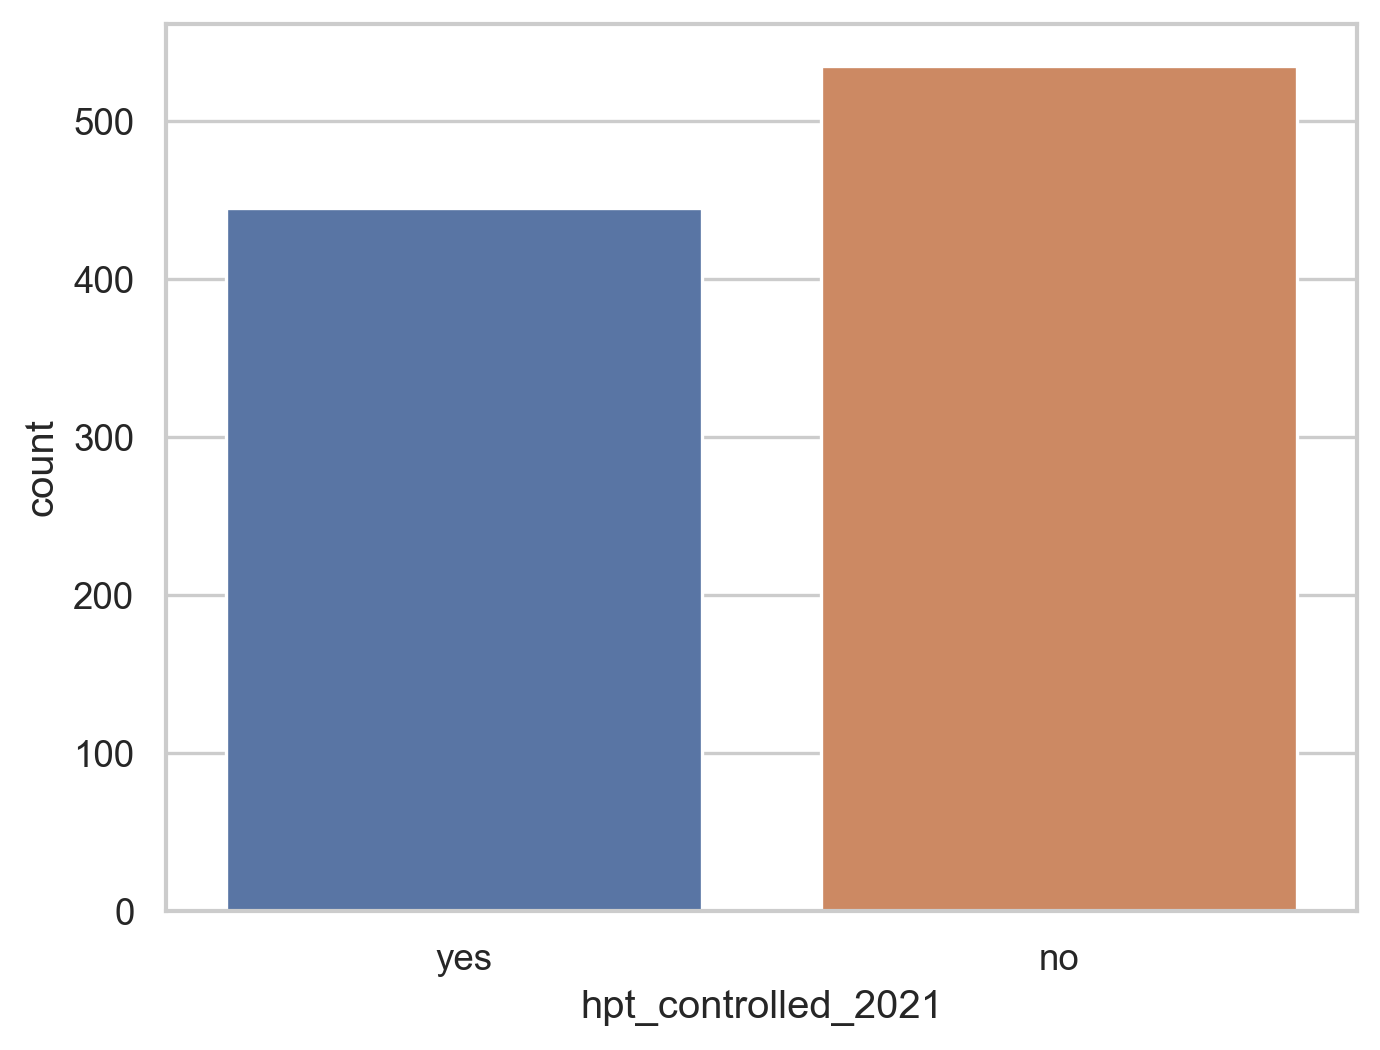

In [9]:
#plotting proportion of labels
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="hpt_controlled_2021", data=data)

We notice that our target variable is imbalanced whereby there are more patients with uncontrolled hypertension (about 525) than those with controlled hypertension (445).

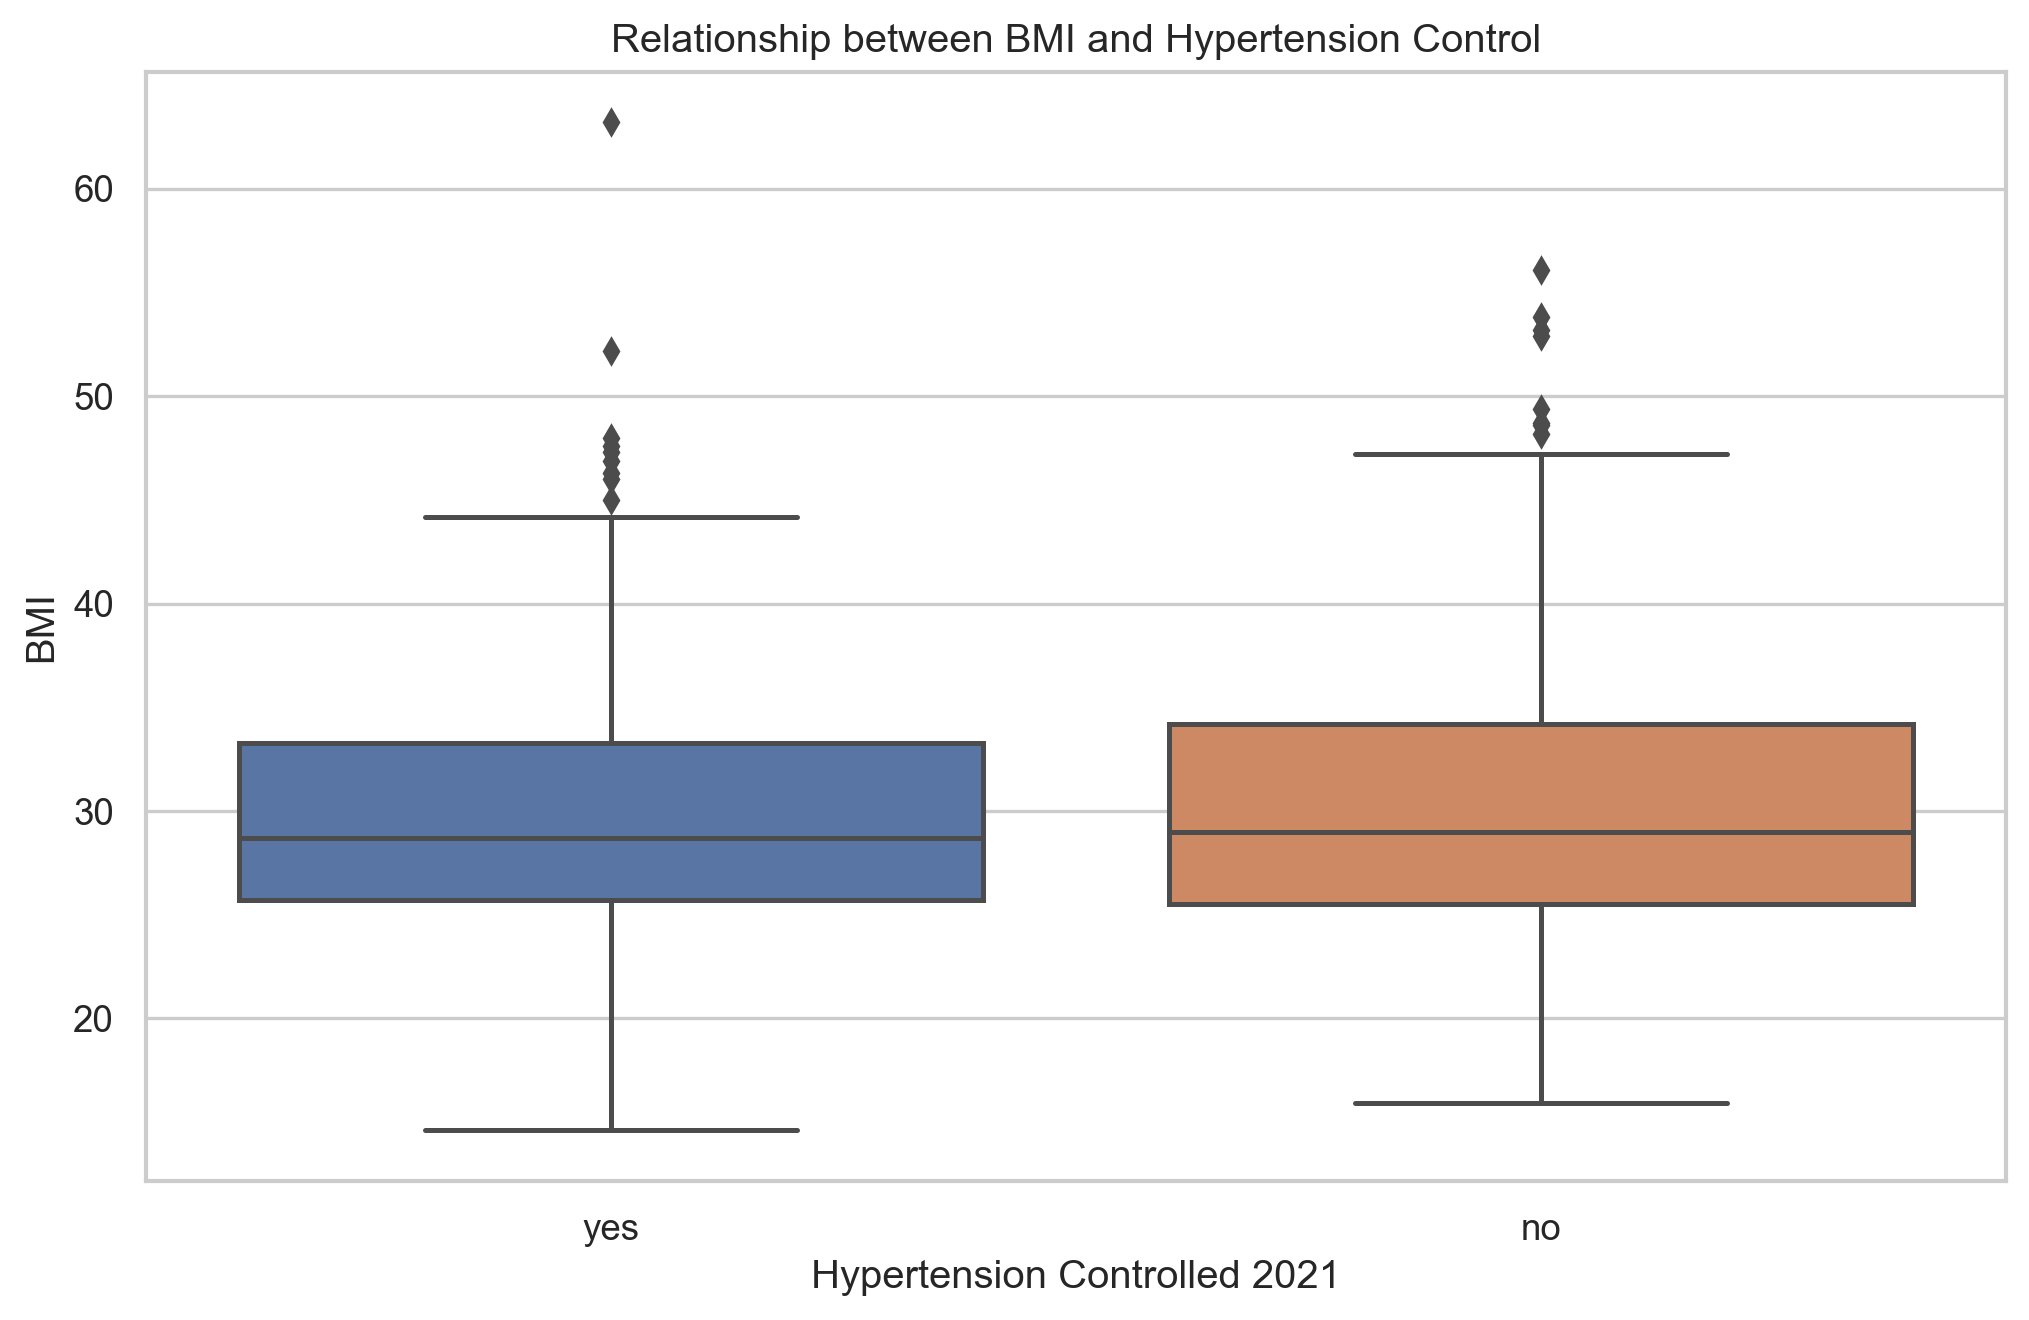

In [10]:
#relationship between 'bmi' and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='hpt_controlled_2021', y='bmi')
plt.title('Relationship between BMI and Hypertension Control')
plt.xlabel('Hypertension Controlled 2021')
plt.ylabel('BMI')
plt.show()

In [11]:
#filling missing values in the 'bmi' column with the median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

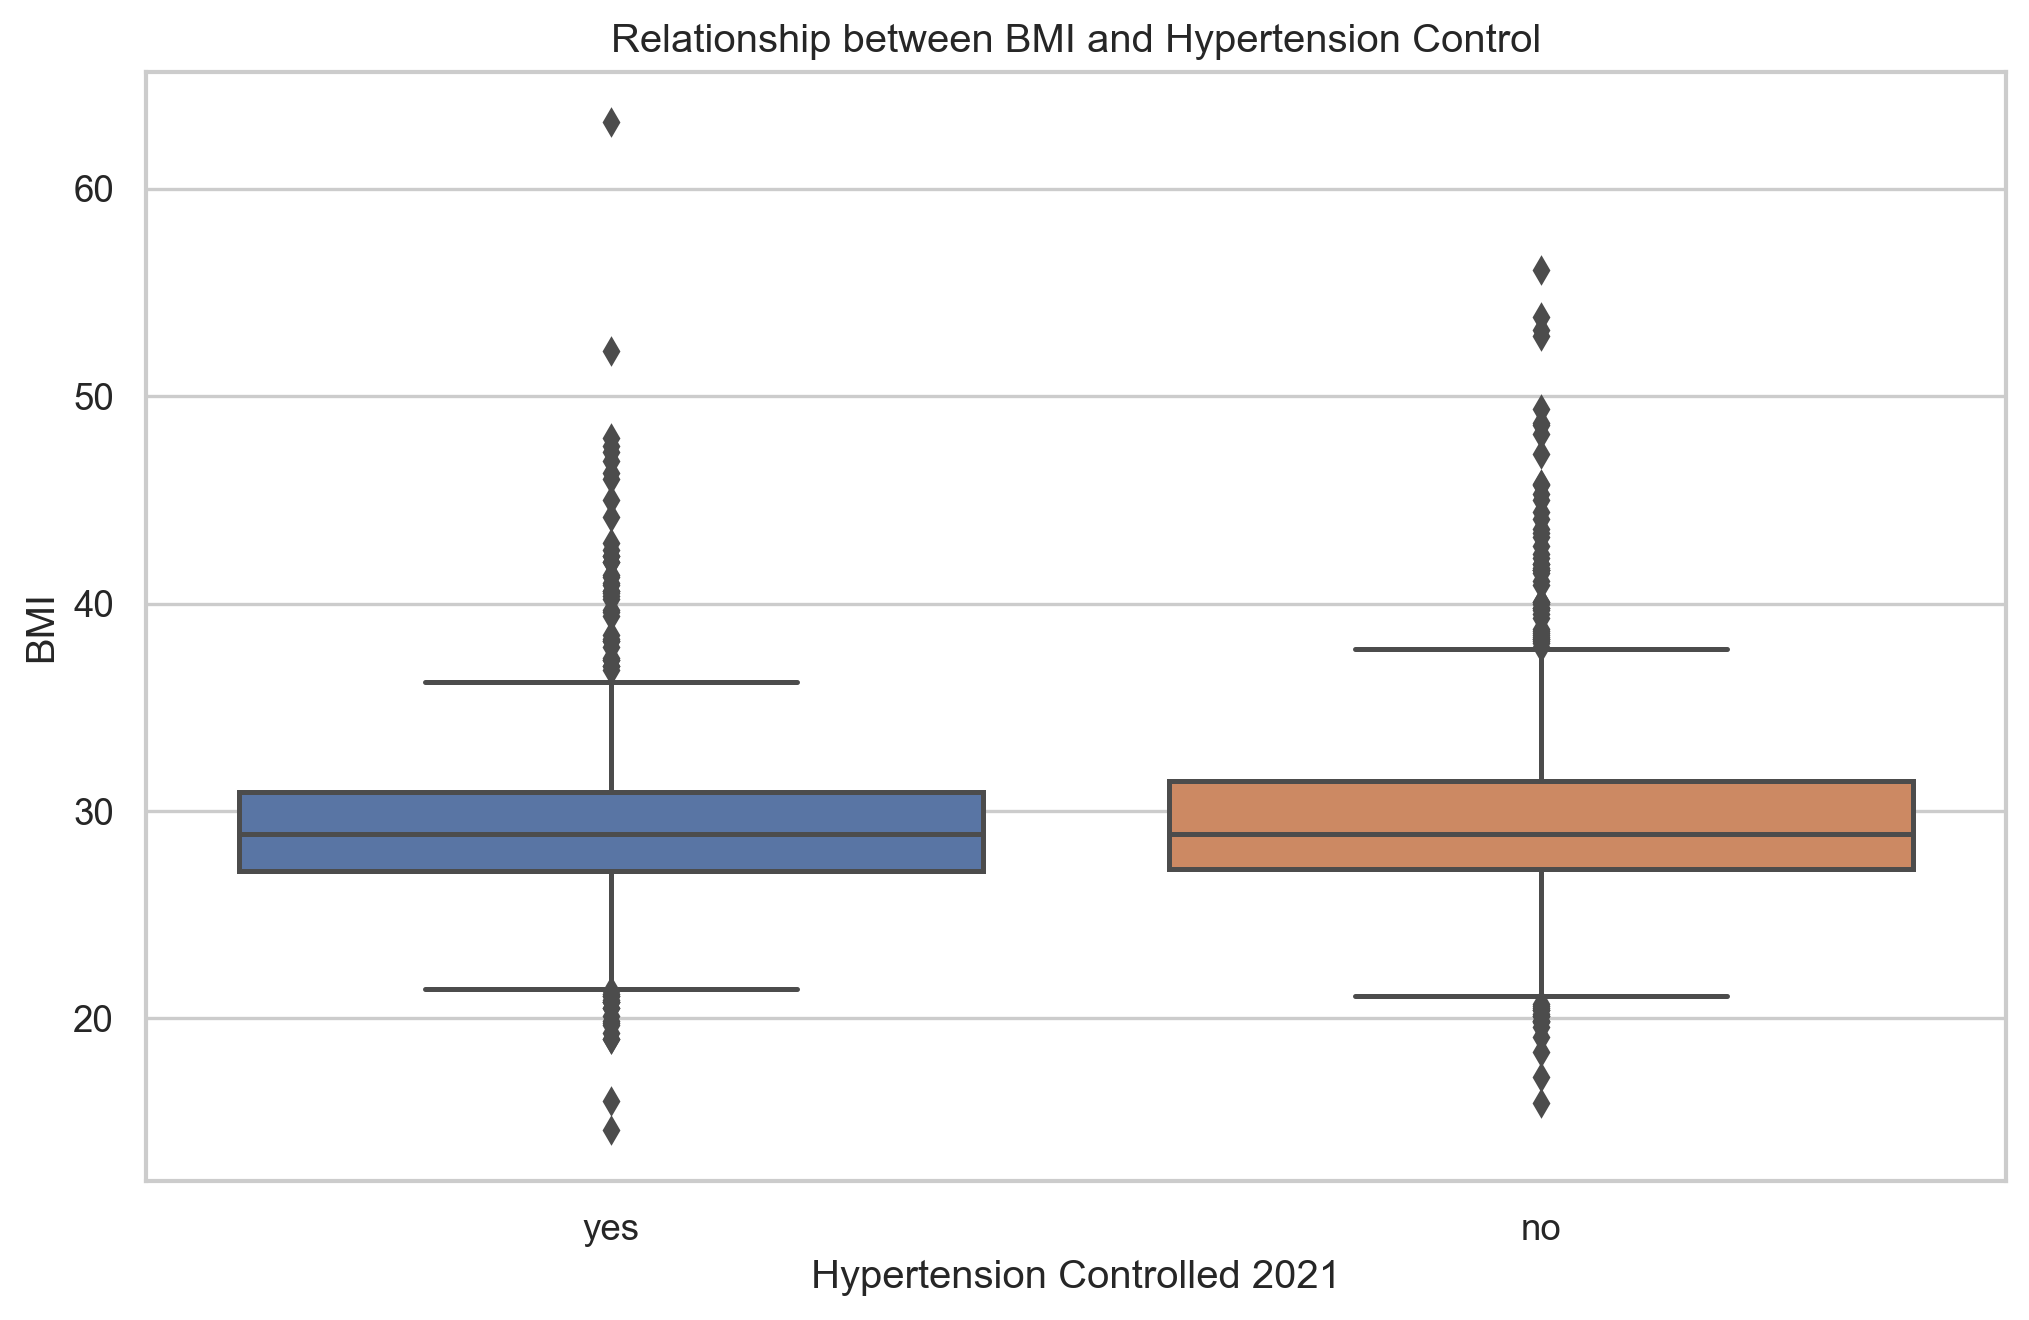

In [12]:
#relationship between new 'bmi' and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='hpt_controlled_2021', y='bmi')
plt.title('Relationship between BMI and Hypertension Control')
plt.xlabel('Hypertension Controlled 2021')
plt.ylabel('BMI')
plt.show()

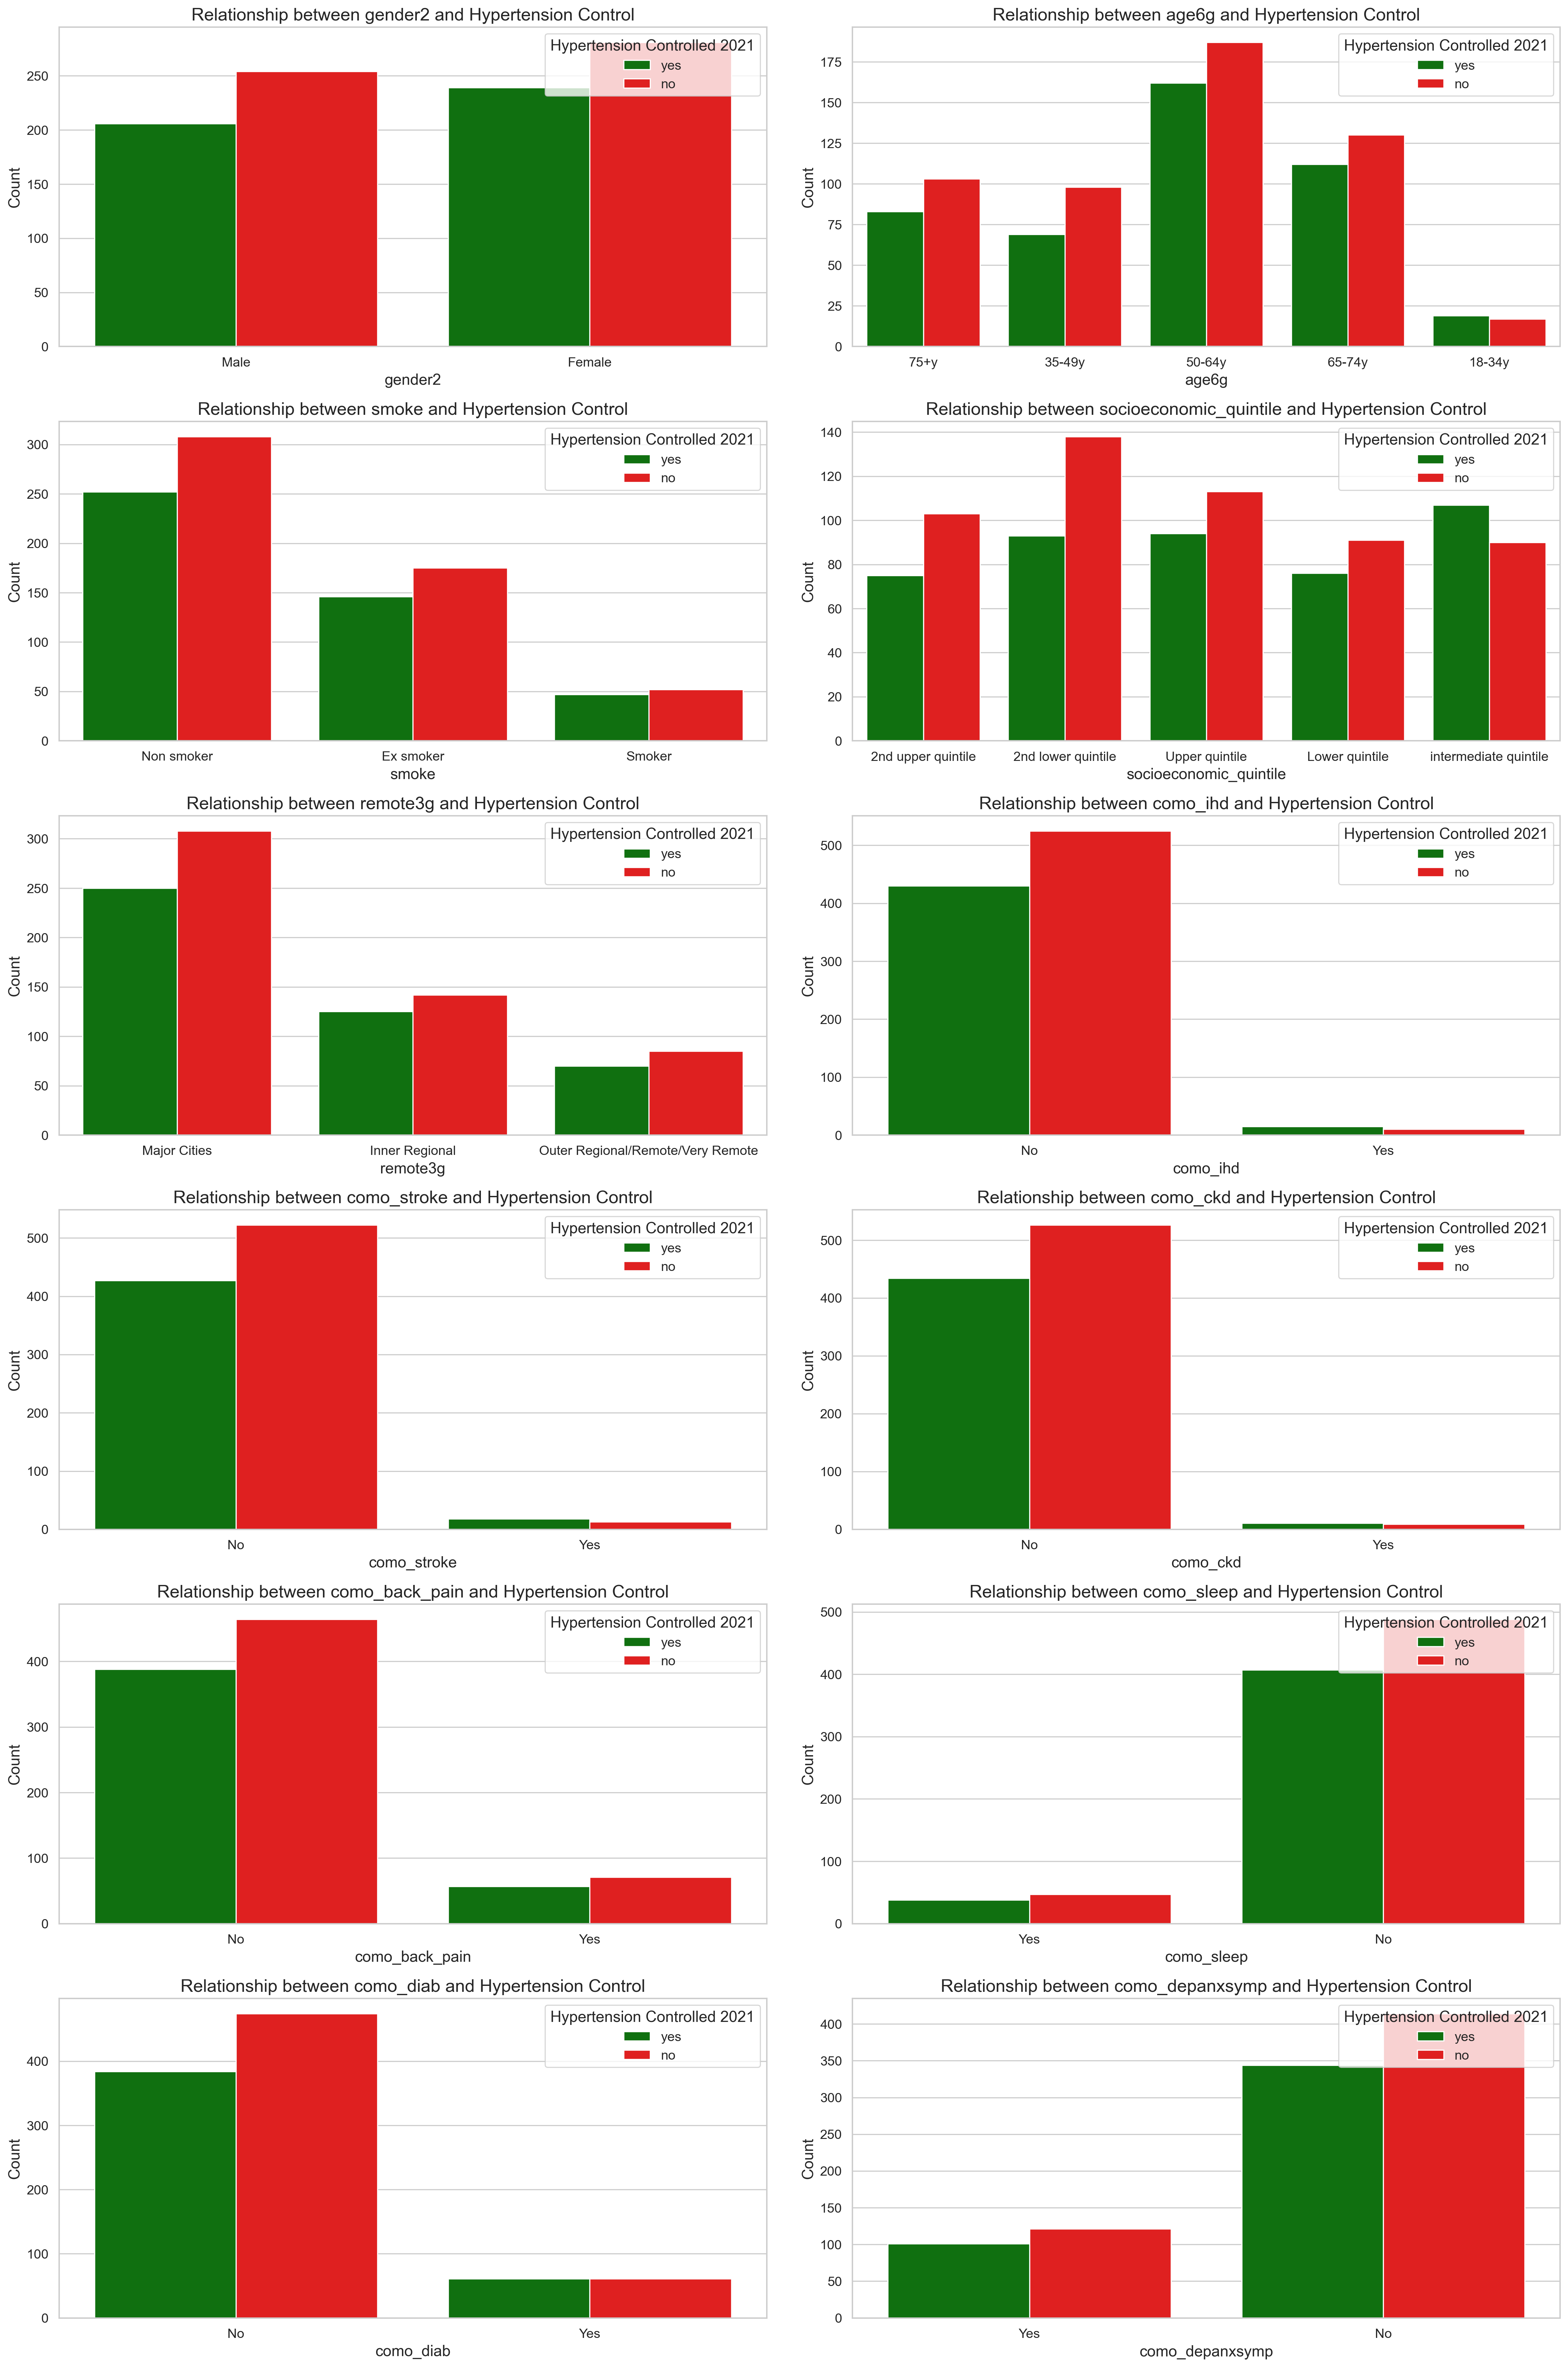

In [13]:
#define the categorical features
categorical_features = [
    'gender2', 'age6g', 'smoke', 'socioeconomic_quintile', 'remote3g',
    'como_ihd', 'como_stroke', 'como_ckd',
    'como_back_pain', 'como_sleep', 'como_diab', 'como_depanxsymp'
]

#determine the number of rows and columns for subplots
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

#define the color palette
custom_palette = {'yes': 'green', 'no': 'red'}

#matplotlib figure setup
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

#relationship between each categorical feature and the target variable
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, hue='hpt_controlled_2021', palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Hypertension Control', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend(title='Hypertension Controlled 2021', loc='upper right', fontsize=12, title_fontsize=14)

#remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#spacing between plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()

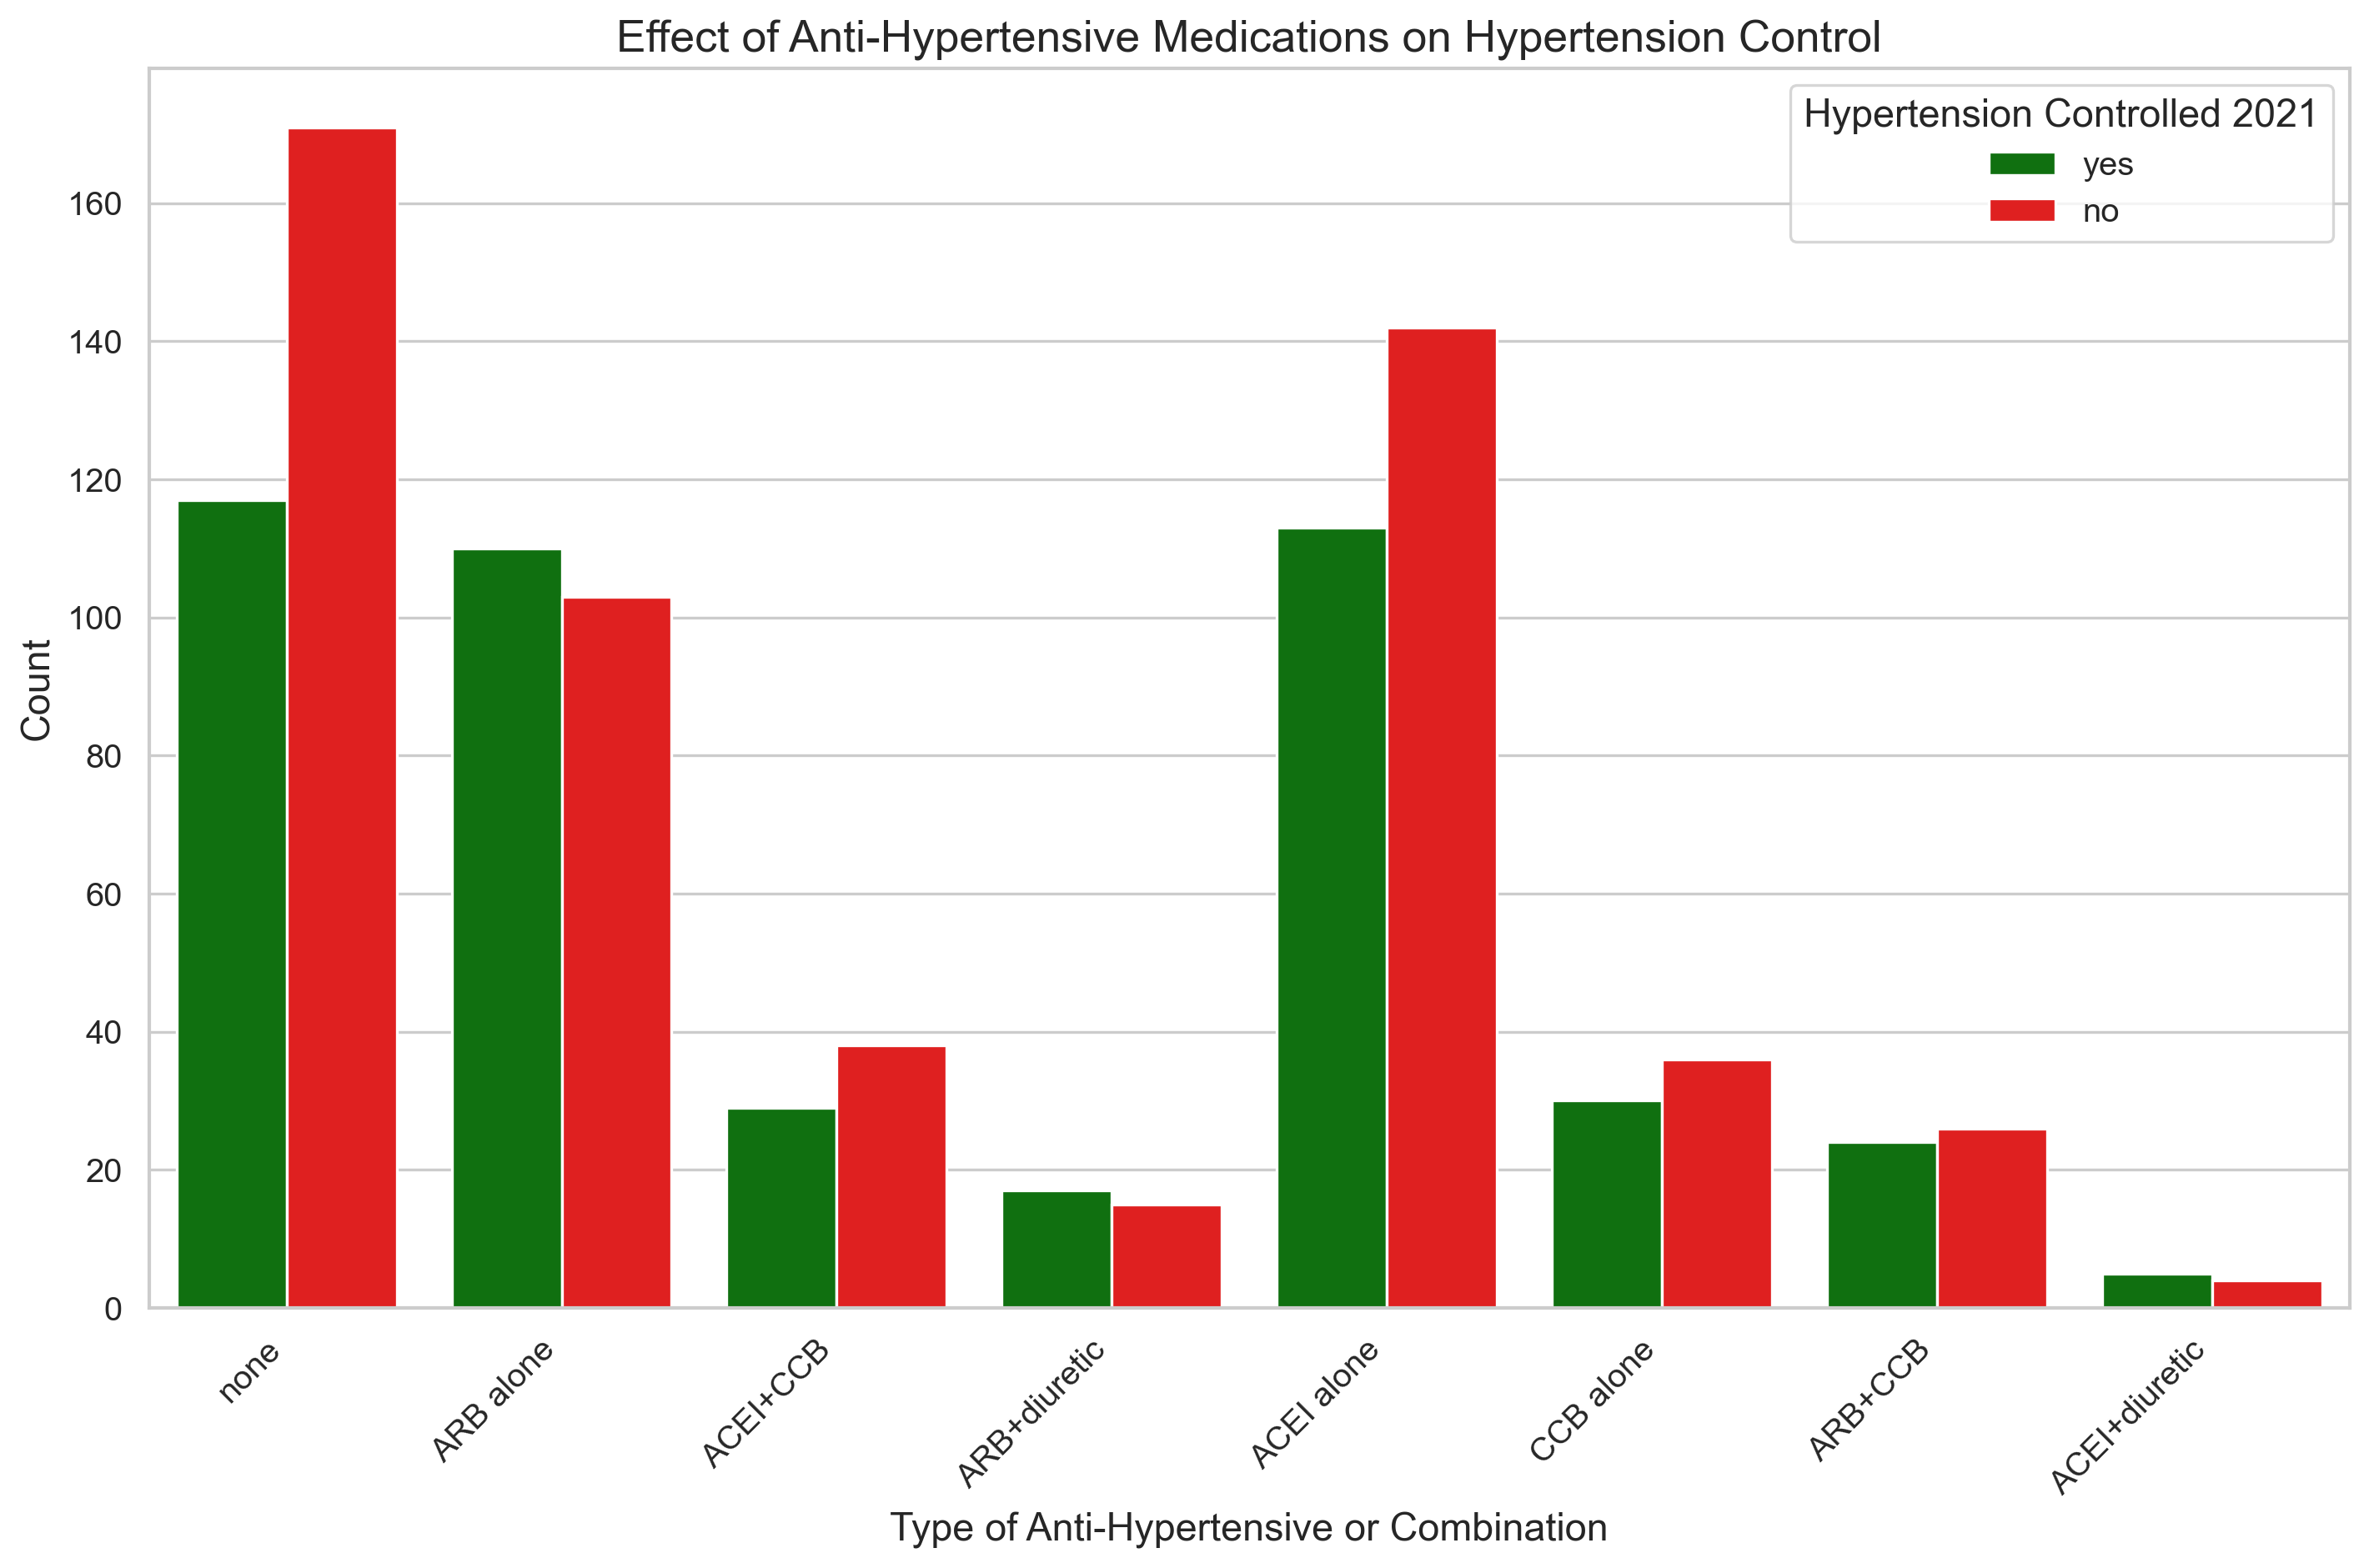

In [14]:
#relationship between 'comb_antihpt2020' and 'hpt_controlled_2021'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='comb_antihpt2020', hue='hpt_controlled_2021', palette=custom_palette)
plt.title('Effect of Anti-Hypertensive Medications on Hypertension Control', fontsize=16)
plt.xlabel('Type of Anti-Hypertensive or Combination', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Hypertension Controlled 2021', loc='upper right', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

## Feature engineering

In [15]:
#extracting days elapsed since first_receiver_hpt
data['first_receiver_elapsed'] = (pd.to_datetime('2021-01-01') - data['first_receiver_hpt']).dt.days

#dropping the original column
data.drop(columns=['first_receiver_hpt'], inplace=True)

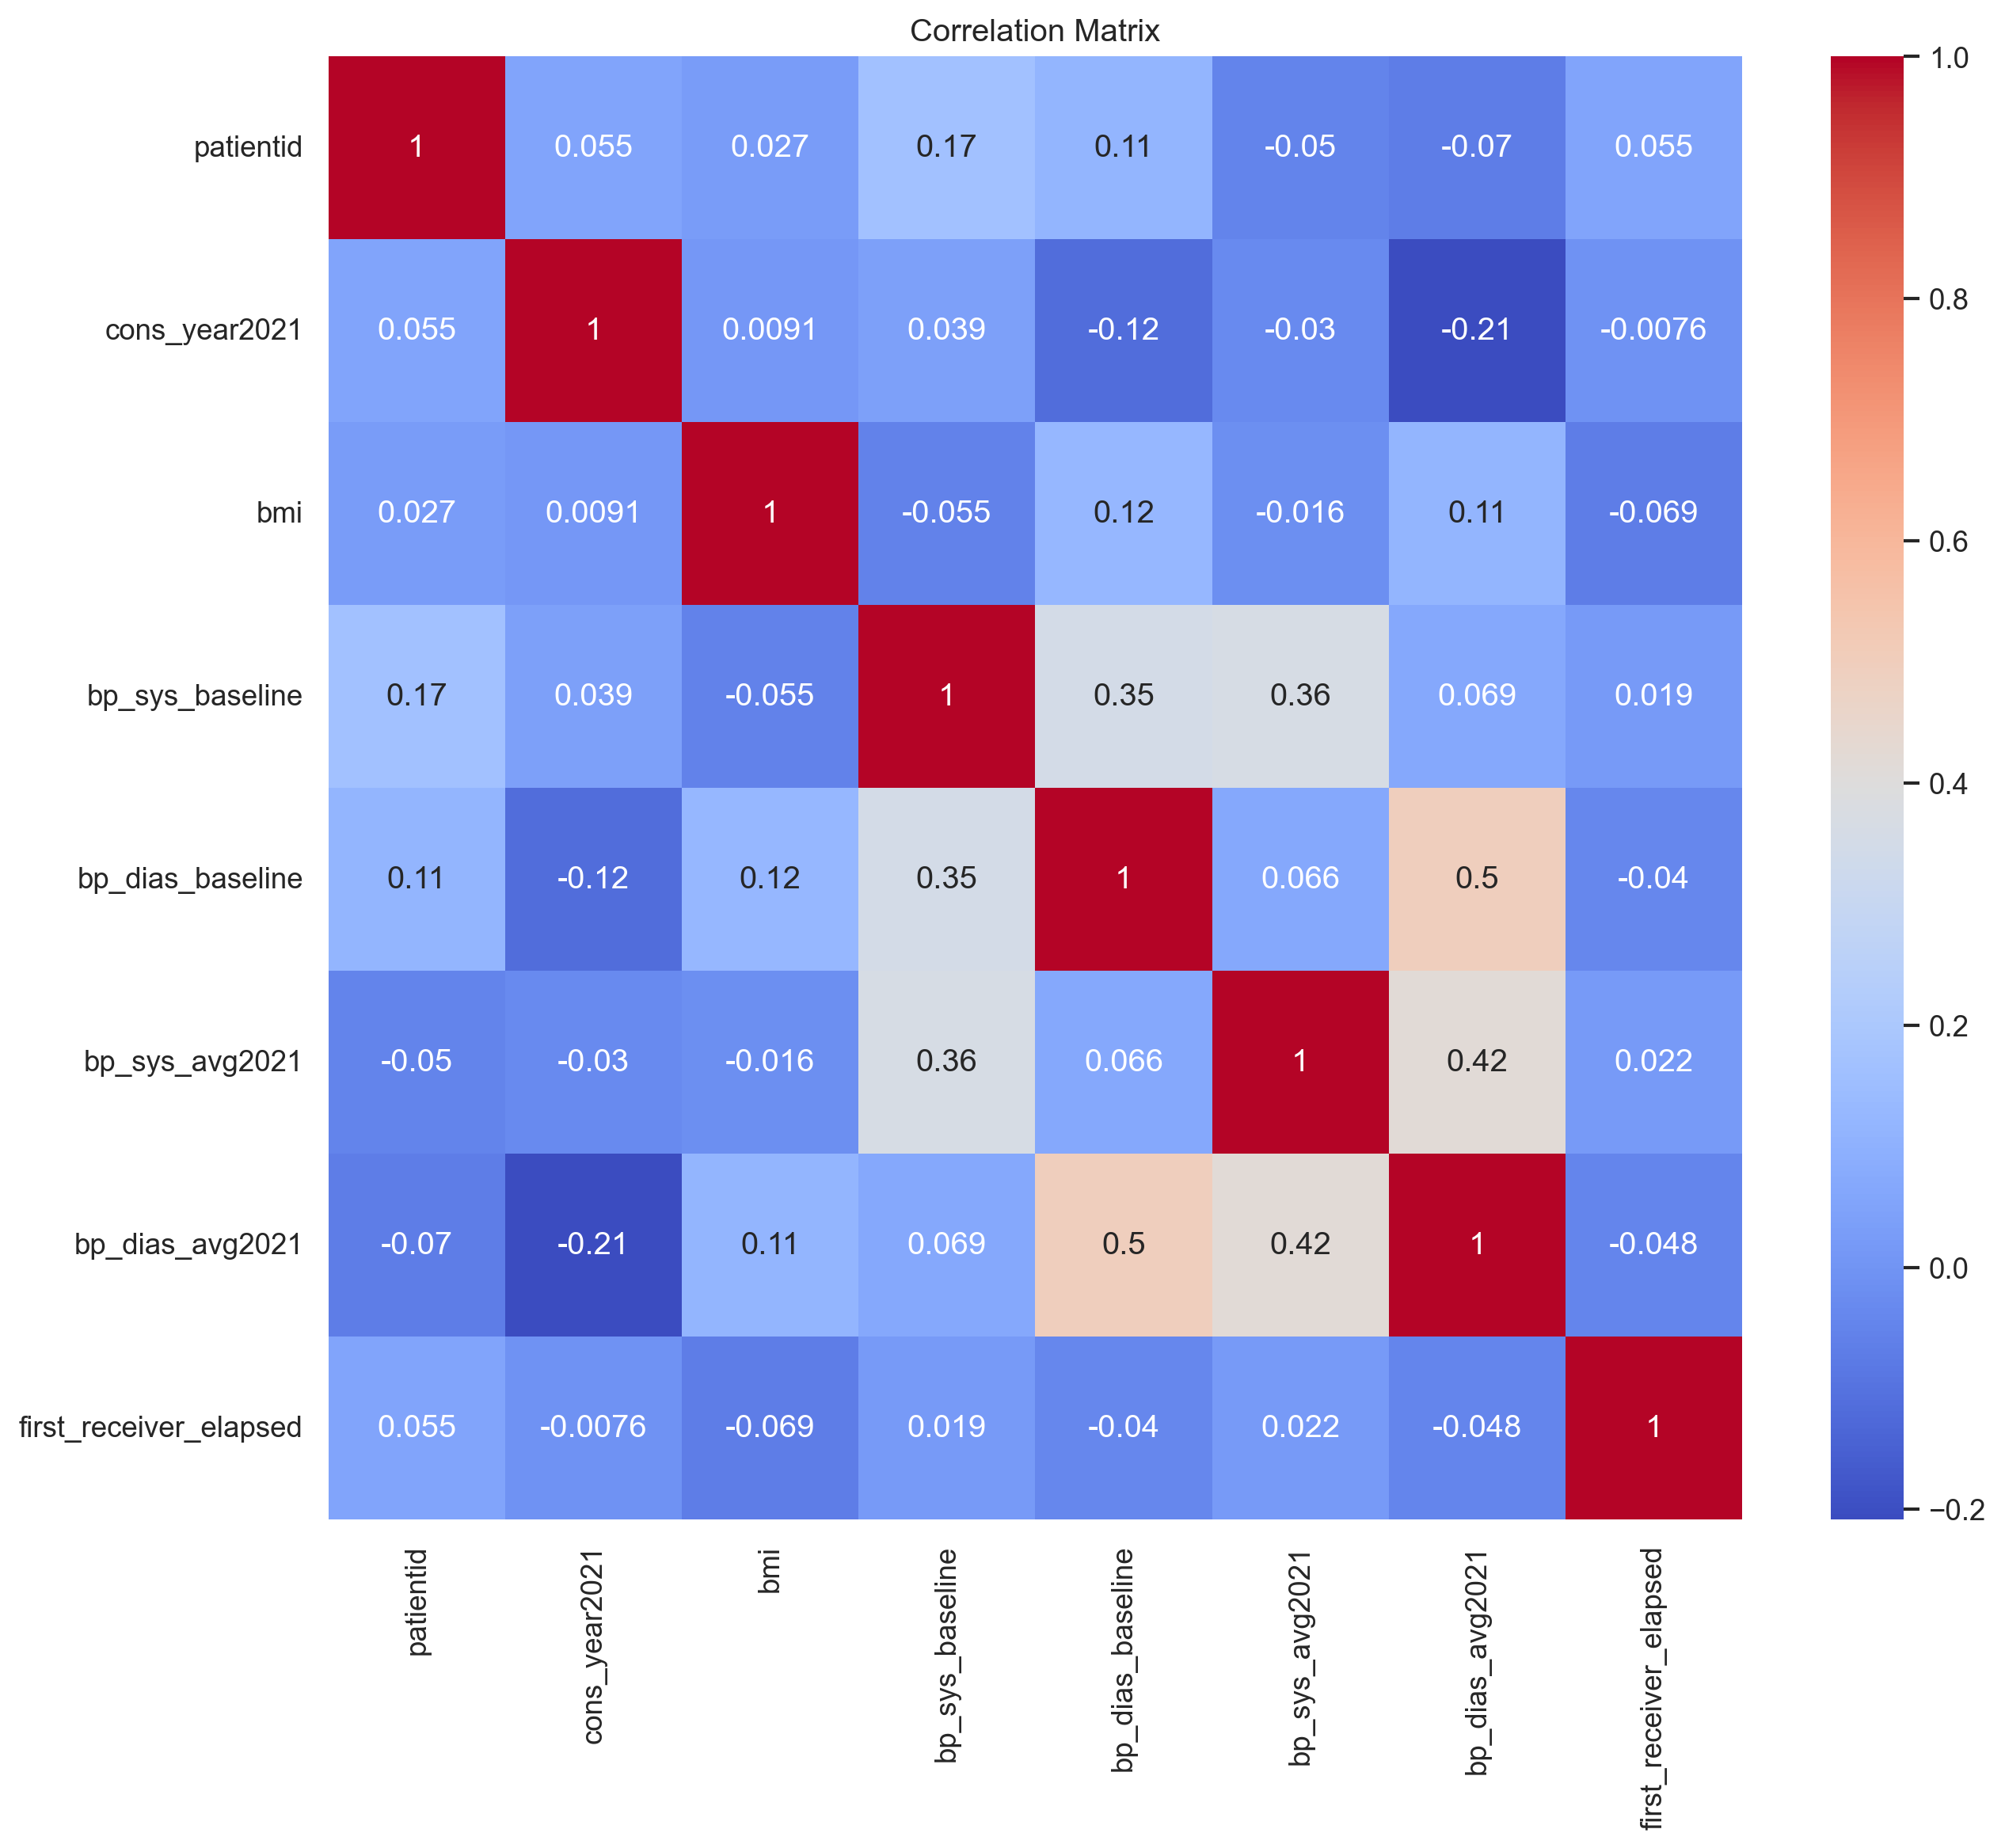

In [16]:
#correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['patientid', 'cons_year2021', 'bmi', 'bp_sys_baseline',
       'bp_dias_baseline', 'bp_sys_avg2021', 'bp_dias_avg2021',
       'first_receiver_elapsed'],
      dtype='object')

In [18]:
#dropping unused num features
features_to_drop = ['patientid', 'hpt_controlled_2021', 'bp_sys_avg2021', 'bp_dias_avg2021']
numerical_features = numerical_features[~numerical_features.isin(features_to_drop)]
numerical_features

Index(['cons_year2021', 'bmi', 'bp_sys_baseline', 'bp_dias_baseline',
       'first_receiver_elapsed'],
      dtype='object')

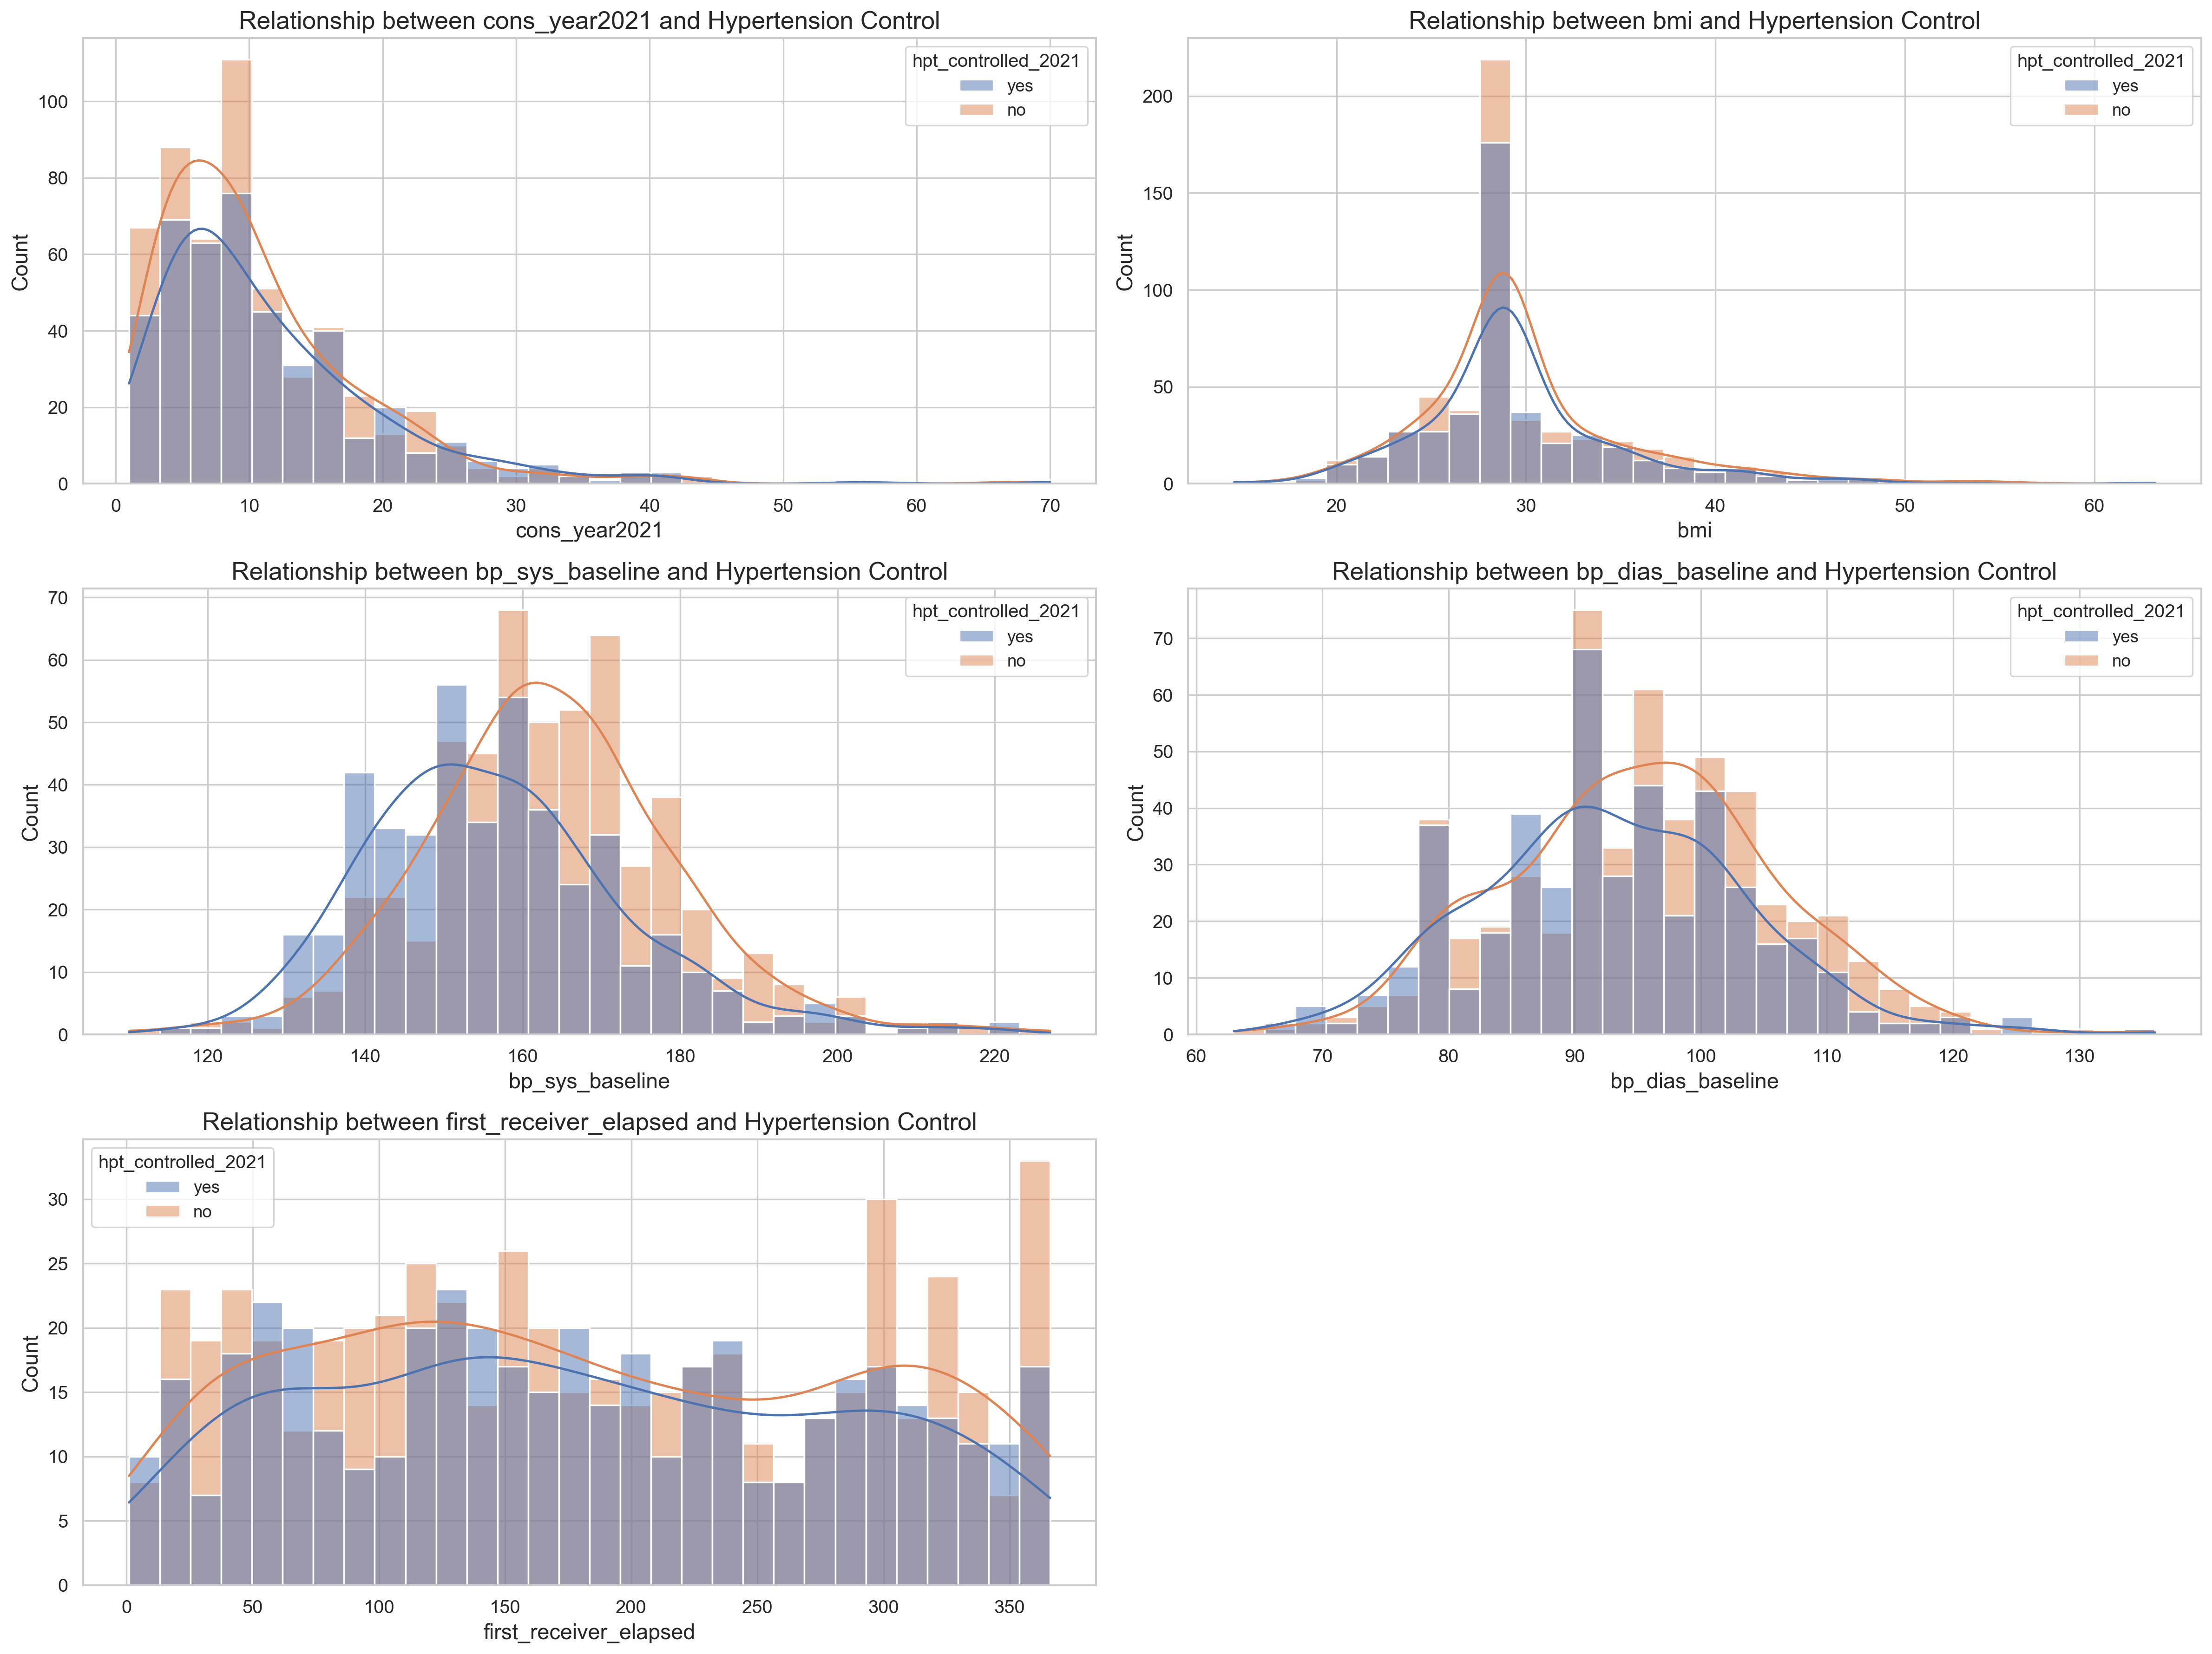

In [19]:
#determine the number of rows and columns for subplots
n_features = len(numerical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

#define the color palette
custom_palette = {'yes': 'green', 'no': 'red'}

#matplotlib figure setup
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

#relationship between each categorical feature and the target variable
for i, feature in enumerate(numerical_features):
    sns.histplot(data=data, x=feature, hue='hpt_controlled_2021', bins=30, kde=True, ax=axes[i], edgecolor=None)
    axes[i].set_title(f'Relationship between {feature} and Hypertension Control', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

#remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#spacing between plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()

In [20]:
# based on a single baseline measurement, the average could be a few standard deviations away from this (check online)

# Build, Train and Optimise Classifiers

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from tqdm import tqdm


In [22]:
#converting target variable to binary format
data['hpt_controlled_2021'] = data['hpt_controlled_2021'].map({'yes': 1, 'no': 0})

In [23]:
#extracting features and target from the training data
X_train = data.drop(['patientid', 'hpt_controlled_2021', 'bp_sys_avg2021', 'bp_dias_avg2021'], axis=1)
y_train = data['hpt_controlled_2021']

#splitting the training data for model evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Building a pipeline

In [24]:
#identifying numerical and categorical features
numerical_features = ['bmi', 'bp_sys_baseline', 'bp_dias_baseline', 'first_receiver_elapsed']
categorical_features = [
    'gender2', 'age6g', 'smoke', 'socioeconomic_quintile', 'remote3g',
    'como_ihd', 'como_stroke', 'como_ckd',
    'como_back_pain', 'como_sleep', 'como_diab', 'como_depanxsymp', 'comb_antihpt2020'
]

#preprocessing pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#preprocessing pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#combining numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

## Defining models

In [25]:
#defining the models and their pipelines
models = {
    'SGD': Pipeline([
        ('preprocessor', preprocessor),
        ('sgd', SGDClassifier(random_state=42))
    ]),
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())
    ]),
    'DecisionTree': Pipeline([
        ('preprocessor', preprocessor),
        ('dtc', DecisionTreeClassifier(random_state=42))
    ]),
    'SVC': Pipeline([
        ('preprocessor', preprocessor),
        ('svc', SVC(random_state=42, probability=True))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(random_state=42))
    ]),
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('log_reg', LogisticRegression(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

### Defining hyperparameters for each model

In [26]:
#hyperparameters for each model
params = {
    'SGD': {
        'sgd__loss': ['log_loss', 'modified_huber', 'perceptron', 'hinge'],
        'sgd__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'sgd__penalty': ['l2', 'l1', 'elasticnet'],
        'sgd__learning_rate': ['constant', 'optimal'],
        'sgd__eta0': [0.00001, 0.0001, 0.001, 0.01, 0.1]
    },
    'KNN': {
        'knn__leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'knn__p': [1, 2]
    },
    'DecisionTree': {
        'dtc__splitter': ["best", "random"],
        'dtc__max_depth': [1, 3, 5, 7],
        'dtc__min_samples_leaf': [1, 3, 5, 7],
        'dtc__max_features': ["sqrt", "log2", None],
        'dtc__min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
        'dtc__max_leaf_nodes': [None, 2, 4, 6, 8]
    },
    'SVC': {
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    'RandomForest': {
        'rf__n_estimators': [10, 50, 100, 200],
        'rf__max_depth': [None, 10, 20, 30],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression': {
        'log_reg__penalty': ['l2', 'none'],
        'log_reg__C': [0.01, 0.1, 1, 10, 100],
        'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'XGBoost': {
        'xgb__n_estimators': [50, 100, 200],
        'xgb__max_depth': [3, 4, 5, 6],
        'xgb__learning_rate': [0.01, 0.1, 0.2],
        'xgb__subsample': [0.8, 0.9, 1.0]
    }
}

## Using GridSearchCV to Find the Best Parameters

In [27]:
#function to perform Grid Search
def perform_grid_search(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='roc_auc', return_train_score=True, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

In [28]:
#performing grid search for each model
grid_results = {}
for model_name in models:
    print(f"\n{'='*20} Performing Grid Search for {model_name} {'='*20}\n")
    with tqdm(total=100, desc=model_name) as pbar:
        grid_results[model_name] = perform_grid_search(models[model_name], params[model_name], X_train_split, y_train_split)
        pbar.update(100)
    print(f"\nBest parameters for {model_name}: {grid_results[model_name].best_params_}")
    print(f"Best ROC-AUC score for {model_name}: {grid_results[model_name].best_score_}\n")


==================== Performing Grid Search for SGD ====================



SGD:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


SGD: 100%|██████████| 100/100 [00:54<00:00,  1.84it/s]



Best parameters for SGD: {'sgd__alpha': 0.01, 'sgd__eta0': 0.1, 'sgd__learning_rate': 'constant', 'sgd__loss': 'log_loss', 'sgd__penalty': 'l1'}
Best ROC-AUC score for SGD: 0.6491978959942968


==================== Performing Grid Search for KNN ====================



KNN:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KNN: 100%|██████████| 100/100 [00:38<00:00,  2.60it/s]



Best parameters for KNN: {'knn__leaf_size': 1, 'knn__n_neighbors': 12, 'knn__p': 2}
Best ROC-AUC score for KNN: 0.6040625421475502


==================== Performing Grid Search for DecisionTree ====================



DecisionTree:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


DecisionTree: 100%|██████████| 100/100 [01:52<00:00,  1.12s/it]



Best parameters for DecisionTree: {'dtc__max_depth': 3, 'dtc__max_features': None, 'dtc__max_leaf_nodes': None, 'dtc__min_samples_leaf': 1, 'dtc__min_weight_fraction_leaf': 0.3, 'dtc__splitter': 'best'}
Best ROC-AUC score for DecisionTree: 0.6361486291208263


==================== Performing Grid Search for SVC ====================



SVC:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 168 candidates, totalling 840 fits


SVC: 100%|██████████| 100/100 [01:36<00:00,  1.03it/s]



Best parameters for SVC: {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best ROC-AUC score for SVC: 0.6445983699736036


==================== Performing Grid Search for RandomForest ====================



RandomForest:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 144 candidates, totalling 720 fits


RandomForest: 100%|██████████| 100/100 [00:50<00:00,  1.98it/s]



Best parameters for RandomForest: {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best ROC-AUC score for RandomForest: 0.640122926340533


==================== Performing Grid Search for LogisticRegression ====================



LogisticRegression:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


LogisticRegression: 100%|██████████| 100/100 [00:03<00:00, 27.84it/s]



Best parameters for LogisticRegression: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear'}
Best ROC-AUC score for LogisticRegression: 0.6435190073408991


==================== Performing Grid Search for XGBoost ====================



XGBoost:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 108 candidates, totalling 540 fits


XGBoost: 100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


Best parameters for XGBoost: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}
Best ROC-AUC score for XGBoost: 0.6423190304618408



## Evaluating the models

In [29]:
#function to print evaluation metrics
def print_metrics(X_val, y_val, model):
    y_pred = model.predict(X_val)
    print("Classification Report:\n", classification_report(y_val, y_pred, digits = 4))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    if hasattr(model, "predict_proba"):
        print("ROC-AUC Score:", roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))
    else:
        print("ROC-AUC Score (using decision_function):", roc_auc_score(y_val, model.decision_function(X_val)))

#function to evaluate models and get ROC-AUC score
def evaluate_model(X_val, y_val, model):
    y_pred = model.predict(X_val)
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    else:
        roc_auc = roc_auc_score(y_val, model.decision_function(X_val))
    return roc_auc

#evaluating the models on the validation set and select the best model
best_model_name = None
best_model_score = -1
best_model = None

for model_name in grid_results:
    print(f"Evaluating {model_name}...")
    model = grid_results[model_name]
    score = evaluate_model(X_val_split, y_val_split, model)
    print_metrics(X_val_split, y_val_split, grid_results[model_name])
    print()
    if score > best_model_score:
        best_model_score = score
        best_model_name = model_name
        best_model = model

Evaluating SGD...
Classification Report:
               precision    recall  f1-score   support

           0     0.6207    0.6792    0.6486       106
           1     0.5750    0.5111    0.5412        90

    accuracy                         0.6020       196
   macro avg     0.5978    0.5952    0.5949       196
weighted avg     0.5997    0.6020    0.5993       196

Confusion Matrix:
 [[72 34]
 [44 46]]
ROC-AUC Score: 0.6217505241090148

Evaluating KNN...
Classification Report:
               precision    recall  f1-score   support

           0     0.5613    0.8208    0.6667       106
           1     0.5366    0.2444    0.3359        90

    accuracy                         0.5561       196
   macro avg     0.5489    0.5326    0.5013       196
weighted avg     0.5499    0.5561    0.5148       196

Confusion Matrix:
 [[87 19]
 [68 22]]
ROC-AUC Score: 0.5443920335429769

Evaluating DecisionTree...
Classification Report:
               precision    recall  f1-score   support

          

In [30]:
print(f"\nBest model based on validation performance: {best_model_name} with ROC-AUC score: {best_model_score}")


Best model based on validation performance: SGD with ROC-AUC score: 0.6217505241090148


The hyperparameter settings are displayed below.

In [31]:
best_model.best_params_

{'sgd__alpha': 0.01,
 'sgd__eta0': 0.1,
 'sgd__learning_rate': 'constant',
 'sgd__loss': 'log_loss',
 'sgd__penalty': 'l1'}

We will consequently use this hyperparameter settings for our final SGD model that we shall define below.

In [32]:
sgd_final = Pipeline([
    ('preprocessor', preprocessor),
    ('sgd', SGDClassifier(alpha = 0.01, eta0 = 0.1, learning_rate = 'constant', loss = 'log_loss', penalty = 'l1', random_state=42))
])

#retrain the model on whole training set (train + validation set)
sgd_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi', 'bp_sys_baseline',
                                                   'bp_dias_baseline',
                                                   'first_receiver_elapsed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender2', 'age6g', 'smoke',
                                                   'socioeconomic_quintile',
                                                   'remote3g', 'como_ihd',
                                                   'como_stroke', 'como_ckd',
                                                   'como_back_pain',
                                                   'como_sleep', 'como_diab',
                                                   'como_depanxsymp',
                                                   'comb_antihpt2020'])])),
                ('sgd',
                 SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='constant',
                               loss='log_loss', penalty='l1',
                               random_state=42))])

# Predicting on Test Set

In [33]:
test = pd.read_excel("hypertension_test_nooutcome.xls")
test.head()

,patientid,cons_year2021,gender2,age6g,smoke,socioeconomic_quintile,remote3g,first_recever_hpt,como_ihd,como_stroke,como_ckd,como_back_pain,como_sleep,como_diab,como_depanxsymp,bmi,comb_antihpt2020,bp_sys_baseline,bp_dias_baseline
0,1353,12,Male,50-64y,Ex smoker,2nd lower quintile,Inner Regional,2020-02-26,No,No,No,No,No,No,No,11.5,none,169.0,82.0
1,1652,19,Female,65-74y,Non smoker,Lower quintile,Inner Regional,2020-04-23,No,No,No,No,No,No,No,13.9,ARB alone,162.0,85.0
2,1165,19,Male,50-64y,Ex smoker,Lower quintile,Inner Regional,2020-01-24,No,No,No,Yes,Yes,No,Yes,14.7,none,184.0,100.0
3,1762,12,Male,75+y,Smoker,2nd lower quintile,Major Cities,2020-05-18,No,No,No,No,No,No,Yes,16.3,none,160.0,85.5
4,2641,13,Male,75+y,Ex smoker,Lower quintile,Inner Regional,2020-09-28,No,No,Yes,No,No,No,No,17.0,ARB alone,171.0,100.0


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   patientid               2241 non-null   int64         
 1   cons_year2021           2241 non-null   int64         
 2   gender2                 2241 non-null   object        
 3   age6g                   2241 non-null   object        
 4   smoke                   2241 non-null   object        
 5   socioeconomic_quintile  2241 non-null   object        
 6   remote3g                2241 non-null   object        
 7   first_recever_hpt       2241 non-null   datetime64[ns]
 8   como_ihd                2241 non-null   object        
 9   como_stroke             2241 non-null   object        
 10  como_ckd                2241 non-null   object        
 11  como_back_pain          2241 non-null   object        
 12  como_sleep              2241 non-null   object  

In [35]:
test.describe()

,patientid,cons_year2021,bmi,bp_sys_baseline,bp_dias_baseline
count,2241.000000,2241.000000,1568.000000,2241.000000,2241.000000
mean,2101.000000,10.884873,30.869305,160.126804,94.605563
std,647.065298,7.815287,8.155823,15.982212,10.781254
min,981.000000,1.000000,11.500000,110.000000,60.000000
25%,1541.000000,6.000000,26.175000,150.000000,88.000000
50%,2101.000000,9.000000,29.700000,160.000000,95.000000
75%,2661.000000,14.000000,34.500000,170.000000,100.000000
max,3221.000000,79.000000,148.300000,228.000000,137.000000


In [36]:
test.head()

,patientid,cons_year2021,gender2,age6g,smoke,socioeconomic_quintile,remote3g,first_recever_hpt,como_ihd,como_stroke,como_ckd,como_back_pain,como_sleep,como_diab,como_depanxsymp,bmi,comb_antihpt2020,bp_sys_baseline,bp_dias_baseline
0,1353,12,Male,50-64y,Ex smoker,2nd lower quintile,Inner Regional,2020-02-26,No,No,No,No,No,No,No,11.5,none,169.0,82.0
1,1652,19,Female,65-74y,Non smoker,Lower quintile,Inner Regional,2020-04-23,No,No,No,No,No,No,No,13.9,ARB alone,162.0,85.0
2,1165,19,Male,50-64y,Ex smoker,Lower quintile,Inner Regional,2020-01-24,No,No,No,Yes,Yes,No,Yes,14.7,none,184.0,100.0
3,1762,12,Male,75+y,Smoker,2nd lower quintile,Major Cities,2020-05-18,No,No,No,No,No,No,Yes,16.3,none,160.0,85.5
4,2641,13,Male,75+y,Ex smoker,Lower quintile,Inner Regional,2020-09-28,No,No,Yes,No,No,No,No,17.0,ARB alone,171.0,100.0


In [37]:
#preparing the test data

#correcting typo
test.rename(columns={'first_recever_hpt': 'first_receiver_hpt'}, inplace=True)

#filling missing values in the 'bmi' column with the median
test['bmi'].fillna(test['bmi'].median(), inplace=True)

#extracting days elapsed since first_receiver_hpt
test['first_receiver_elapsed'] = (pd.to_datetime('2021-01-01') - test['first_receiver_hpt']).dt.days

#dropping the original column
test.drop(columns=['first_receiver_hpt', 'patientid'], inplace=True)


In [38]:
#making sure the features are in the same order as they were fit during training
train_columns = list(X_train.columns)
test = test[train_columns]

In [39]:
#checking if everything is in order
test.head()                    

,cons_year2021,gender2,age6g,smoke,socioeconomic_quintile,remote3g,como_ihd,como_stroke,como_ckd,como_back_pain,como_sleep,como_diab,como_depanxsymp,bmi,comb_antihpt2020,bp_sys_baseline,bp_dias_baseline,first_receiver_elapsed
0,12,Male,50-64y,Ex smoker,2nd lower quintile,Inner Regional,No,No,No,No,No,No,No,11.5,none,169.0,82.0,310
1,19,Female,65-74y,Non smoker,Lower quintile,Inner Regional,No,No,No,No,No,No,No,13.9,ARB alone,162.0,85.0,253
2,19,Male,50-64y,Ex smoker,Lower quintile,Inner Regional,No,No,No,Yes,Yes,No,Yes,14.7,none,184.0,100.0,343
3,12,Male,75+y,Smoker,2nd lower quintile,Major Cities,No,No,No,No,No,No,Yes,16.3,none,160.0,85.5,228
4,13,Male,75+y,Ex smoker,Lower quintile,Inner Regional,No,No,Yes,No,No,No,No,17.0,ARB alone,171.0,100.0,95


In [40]:
X_test = test

# Making Predictions on the Test Set

In [41]:
#making predictions on the test set
y_test_pred = sgd_final.predict(X_test)

#converting predictions to 'yes' or 'no'
y_test_pred_yes_no = ['yes' if pred == 1 else 'no' for pred in y_test_pred]

#creating a DataFrame with the predictions
predictions_df = pd.DataFrame(y_test_pred_yes_no, index=test.index, columns=['hpt_controlled_2021_pred'])

#saving the predictions
predictions_df.to_csv('hypertension_test_predictions.csv', index=False)

# Extras 

In [42]:
from sklearn.metrics import roc_curve, auc

In [43]:
y_pred_proba = sgd_final.predict_proba(X_val_split)[:, 1]

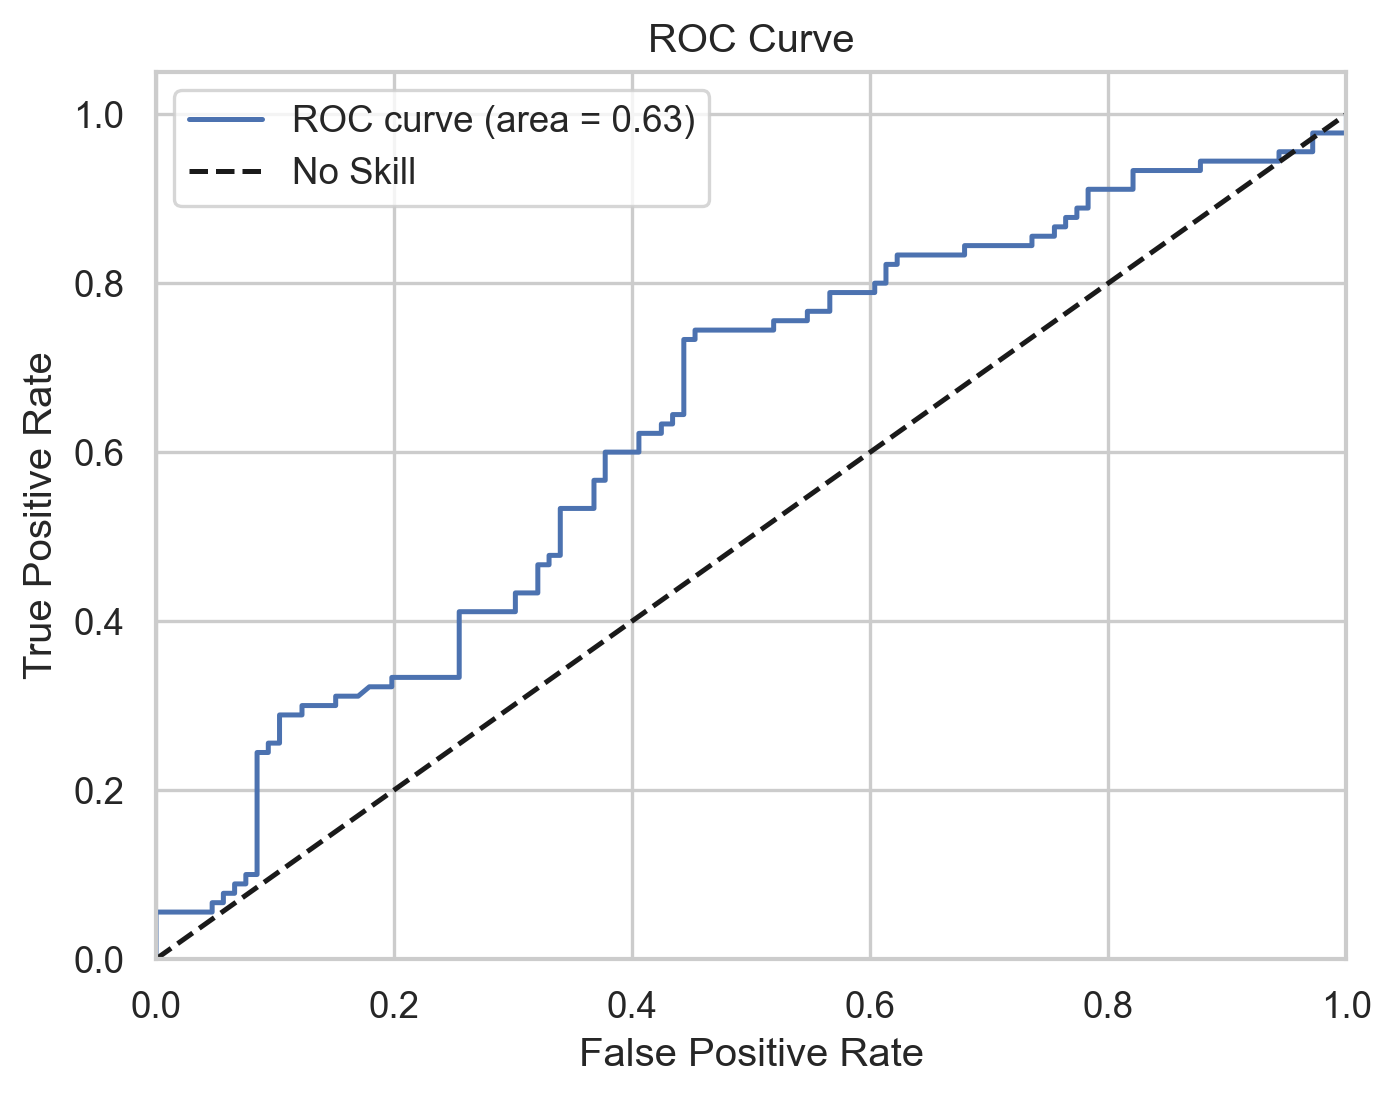

In [44]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_split, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()